<a href="https://colab.research.google.com/github/skywalker0803r/Wastewater-Biological-Treatment/blob/main/20230908.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm

df = pd.read_csv('/content/drive/MyDrive/廢水案子/ALLdatLen.csv')
df

,date,site,cindex,cName,classification,Confidence,D,speciesGroup
0,20230406,T753,117,匣殼蟲,117_匣殼蟲,0.715106,74.874452,2
1,20230406,T753,123,太陽蟲,123_太陽蟲,0.798369,87.695379,2
2,20230406,T753,123,太陽蟲,123_太陽蟲,0.860787,101.565065,2
3,20230406,T753,123,太陽蟲,123_太陽蟲,0.971576,70.468719,2
4,20230406,T753,123,太陽蟲,123_太陽蟲,0.892662,100.863272,2
...,...,...,...,...,...,...,...,...
3410261,20230905,T752A,116,絲狀菌,116_絲狀菌,0.792349,19.317871,10
3410262,20230905,T752A,0,待標記物種,0_待標記物種,0.463465,17.534239,1
3410263,20230905,T752A,116,絲狀菌,116_絲狀菌,0.848624,22.179253,10
3410264,20230905,T752A,116,絲狀菌,116_絲狀菌,0.705828,13.345737,10


# 使用groupby合并具有相同日期的行

In [39]:
result_df = df.groupby(['date', 'cName'])['D'].sum().unstack(fill_value=0)
df = result_df
df

cName,前管蟲,匣殼蟲,厢殼蟲,單鐮蟲,單領鞭毛蟲,太陽蟲,尾絲蟲,待標記物種,扭曲管葉蟲,斜管蟲,...,裂口蟲,變形蟲,變形蟲2,赭纖蟲,輪蟲,輪蟲幼蟲,鏈渦蟲屬,鐘蟲,鞍甲輪蟲,顠體蟲
date,,,,,,,,,,,,,,,,,,,,,
20230406,604.265194,146.165820,0.0,133.706063,0.000000,3233.177383,85080.878854,114600.053096,988.141240,1340.750169,...,0.000000,0.000000,75.956895,93.805214,0.000000,258.860886,5996.183981,3563.214552,159.817510,866.835561
20230407,555.938287,542.187793,0.0,291.009331,0.000000,6267.175023,105622.184407,147312.101387,601.706366,2284.449646,...,0.000000,0.000000,623.897998,0.000000,0.000000,456.608376,7232.610516,858.022075,305.935435,3421.322080
20230424,1858.935020,444.044515,0.0,67.093111,0.000000,5291.386842,86423.478990,144487.530299,787.906192,2782.664074,...,0.000000,157.522593,311.122103,65.299366,264.985352,640.257144,1954.577686,639.163267,174.718516,427.071705
20230425,817.529932,385.141971,0.0,274.080723,0.000000,4216.105306,86587.759632,121801.940282,816.367418,2611.654559,...,0.000000,198.184637,140.771850,106.381828,215.705306,313.884589,5635.571378,248.249720,0.000000,0.000000
20230426,864.704790,577.896805,0.0,250.240442,0.000000,4223.307324,80042.495942,174378.140414,6830.564233,2007.021577,...,0.000000,0.000000,92.668139,0.000000,0.000000,421.636342,12240.743622,2789.019867,0.000000,2472.177246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230829,155.493591,132.805892,0.0,0.000000,52.904026,1127.245252,77908.428668,234864.778876,858.201283,579.812963,...,0.000000,0.000000,0.000000,0.000000,0.000000,124.563144,4972.769206,3001.267868,0.000000,1963.708262
20230830,0.000000,0.000000,0.0,0.000000,72.396335,642.485067,81035.285089,339545.913278,172.200330,1168.826395,...,0.000000,123.497442,141.710114,0.000000,0.000000,192.843379,1076.442493,924.639742,0.000000,69.350590
20230831,237.318769,66.585543,0.0,0.000000,0.000000,716.319314,67005.114456,290347.520241,31.474125,672.838873,...,0.000000,0.000000,0.000000,0.000000,0.000000,60.845022,1612.829577,583.918289,0.000000,287.047870


# MinMax化

In [40]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
df[:] = mm.fit_transform(df[:])
df

cName,前管蟲,匣殼蟲,厢殼蟲,單鐮蟲,單領鞭毛蟲,太陽蟲,尾絲蟲,待標記物種,扭曲管葉蟲,斜管蟲,...,裂口蟲,變形蟲,變形蟲2,赭纖蟲,輪蟲,輪蟲幼蟲,鏈渦蟲屬,鐘蟲,鞍甲輪蟲,顠體蟲
date,,,,,,,,,,,,,,,,,,,,,
20230406,0.083721,0.136220,0.0,0.073059,0.000000,0.451833,0.450388,0.021167,0.126862,0.132412,...,0.000000,0.000000,0.095437,0.529875,0.000000,0.107237,0.318429,0.193142,0.335234,0.086453
20230407,0.077026,0.505295,0.0,0.159012,0.000000,0.915090,0.617202,0.055770,0.077250,0.247171,...,0.000000,0.000000,0.783905,0.000000,0.000000,0.208323,0.389077,0.043427,0.641731,0.341222
20230424,0.257557,0.413830,0.0,0.036661,0.000000,0.766098,0.461291,0.052783,0.101155,0.307757,...,0.000000,0.113716,0.390914,0.368855,0.789324,0.302201,0.087495,0.031315,0.366490,0.042594
20230425,0.113269,0.358936,0.0,0.149761,0.000000,0.601915,0.462625,0.028785,0.104809,0.286961,...,0.000000,0.143070,0.176875,0.600916,0.642531,0.135365,0.297824,0.009680,0.000000,0.000000
20230426,0.119806,0.538575,0.0,0.136735,0.000000,0.603014,0.409472,0.084401,0.876940,0.213434,...,0.000000,0.000000,0.116434,0.000000,0.000000,0.190446,0.675238,0.150295,0.000000,0.246560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230829,0.021544,0.123769,0.0,0.000000,0.016824,0.130280,0.392141,0.148385,0.110180,0.039877,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.038587,0.259952,0.162042,0.000000,0.195849
20230830,0.000000,0.000000,0.0,0.000000,0.023023,0.056263,0.417534,0.259119,0.022108,0.111505,...,0.000000,0.089153,0.178054,0.000000,0.000000,0.073490,0.037320,0.047114,0.000000,0.006917
20230831,0.032881,0.062055,0.0,0.000000,0.000000,0.067537,0.303596,0.207076,0.004041,0.051190,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.006015,0.067968,0.028257,0.000000,0.028628


# 時間序列DATASET

In [41]:
def build_time_series_dataset(df,x_col,y_col,n=None):
  data = {'X':[],'Y':[]}
  for t in tqdm(range(0,len(df)-n,n)):
    curr = df.iloc[t:t+n]
    if np.isnan(curr[x_col].values).sum()==0:
      data['X'].append(curr[x_col].values)
      data['Y'].append(curr[y_col].values[-1])
  data['X'] = np.array(data['X'])
  data['Y'] = np.array(data['Y'])
  data['x_col'] = x_col
  data['y_col'] = y_col
  return data

# train and test data

In [42]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

x_col = df.columns
y_col = df.columns
train_data = build_time_series_dataset(df[:-10],x_col,y_col,n=3)
test_data = build_time_series_dataset(df[-10:],x_col,y_col,n=3)

<ipython-input-41-00d21a16105d>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for t in tqdm(range(0,len(df)-n,n)):


  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

# Model

In [43]:
import torch
import torch.nn as nn
import numpy as np
from torch.optim import Adam
import pandas as pd


class R2D2(nn.Module):
  def __init__(self,obs_size,n_actions,hidden_size):
    super().__init__()
    self.hidden_size = hidden_size
    self.l1 = nn.Linear(obs_size,self.hidden_size)
    self.l2 = nn.LSTMCell(self.hidden_size,self.hidden_size)
    self.l3 = nn.Linear(self.hidden_size,n_actions)

  def forward(self,x,hx,cx):
    x = torch.tanh(self.l1(x))
    hx,cx = self.l2(x,(hx,cx))
    x = torch.tanh(hx)
    x = torch.sigmoid(self.l3(x)) # to range[0,1]
    return x,hx,cx

# forward method

In [44]:
def r2d2_forward(model,x,eval=False,time_step=2):
  # 切換模式
  if eval == True:
    model.eval()
  else:
    model.train()

  # 初始化隱變量
  hx = torch.zeros((x.size()[0],model.hidden_size))
  cx = torch.zeros((x.size()[0],model.hidden_size))

  # 空Y
  values = torch.FloatTensor()

  # RNN FORWARD用法
  for t in range(time_step):
    # 根據當前t時刻狀態,動作,hx,cx當輸入得到,v(產出),更新hx,cx
    v,hx,cx = model(x[:,t,:],hx,cx)
    values = torch.cat((values,v),dim=1)

  # 一系列產出(Batch,Time,Features)
  values = values.reshape(x.size()[0],time_step,-1)

  # 只取最後一個時間點
  return values[:,-1,:] # return last time_step

# INSTANCE MODEL


In [45]:
model = R2D2(
    obs_size=len(df.columns),
    n_actions=len(df.columns),
    hidden_size=64
    )

In [46]:
x = train_data['X']
x = torch.FloatTensor(x)
x.shape

torch.Size([26, 3, 33])

In [47]:
y = r2d2_forward(model,x,eval=False)
y.shape

torch.Size([26, 33])

# TRAIN LOOP

In [48]:
def train_loop(model,train_loader,val_loader,optimizer,device,loss_fn,max_epochs=12):
    history = {'train_loss':[],'val_loss':[]}
    best_loss = np.inf
    best_model = None
    for epoch in tqdm(range(max_epochs)):
        epoch_train_loss = 0.0
        epoch_val_loss = 0.0
        for i,batch in enumerate(train_loader):
            epoch_train_loss += step(model,batch,optimizer,device,loss_fn,mode='train')
        for j,batch in enumerate(val_loader):
            epoch_val_loss += step(model,batch,optimizer,device,loss_fn,mode='val')
        history['train_loss'].append(epoch_train_loss/(i+1))
        history['val_loss'].append(epoch_val_loss/(j+1))
        print(f'epoch:{epoch} train_loss:{epoch_train_loss/(i+1)} val_loss:{epoch_val_loss/(j+1)}')
        if history['val_loss'][-1] <= best_loss:
            best_model = deepcopy(model.eval())
            best_loss = history['val_loss'][-1]
            print(f'save best_model now_val_best_loss is:{best_loss}')
    return best_model.eval() ,history

# SINGLE TRAIN STEP

In [49]:
def step(model,batch,optimizer,device,loss_fn,mode='train'):
    '''
    這個函數實現了模型前向&後向傳播的過程,稱之為step
    '''
    # model to device
    model = model.to(device)
    # change mode(train/val)
    if mode == 'train':
        model.train()
    if mode == 'val':
        model.eval()
    # model forward pass
    x,y = batch
    x = x.to(device)
    y = y.to(device)
    output = r2d2_forward(model,x,eval=False,time_step=2)
    loss = loss_fn(y,output)
    # update model if mode == train
    if mode == 'train':
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return loss.item()

# DEF OPT DEVICE LOSS DATALOADER

In [50]:
from torch.optim import Adam

optimizer = Adam(model.parameters(),lr=1e-3)
device = 'cpu'
loss_fn = nn.MSELoss()
train_loader = DataLoader(TensorDataset(torch.FloatTensor(train_data['X']),torch.FloatTensor(train_data['Y'])),batch_size=64)
val_loader = DataLoader(TensorDataset(torch.FloatTensor(test_data['X']),torch.FloatTensor(test_data['Y'])),batch_size=64)

In [51]:
from copy import deepcopy

best_model ,history = train_loop(model,train_loader,val_loader,optimizer,device,loss_fn,max_epochs=100)

<ipython-input-48-aa742a220bac>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(max_epochs)):


  0%|          | 0/100 [00:00<?, ?it/s]

epoch:0 train_loss:0.17354454100131989 val_loss:0.18129080533981323
save best_model now_val_best_loss is:0.18129080533981323
epoch:1 train_loss:0.17226684093475342 val_loss:0.18029527366161346
save best_model now_val_best_loss is:0.18029527366161346
epoch:2 train_loss:0.17101266980171204 val_loss:0.1793033927679062
save best_model now_val_best_loss is:0.1793033927679062
epoch:3 train_loss:0.16976387798786163 val_loss:0.17830310761928558
save best_model now_val_best_loss is:0.17830310761928558
epoch:4 train_loss:0.16850045323371887 val_loss:0.1772831678390503
save best_model now_val_best_loss is:0.1772831678390503
epoch:5 train_loss:0.16720281541347504 val_loss:0.1762314736843109
save best_model now_val_best_loss is:0.1762314736843109
epoch:6 train_loss:0.16585154831409454 val_loss:0.17513465881347656
save best_model now_val_best_loss is:0.17513465881347656
epoch:7 train_loss:0.16442684829235077 val_loss:0.17397813498973846
save best_model now_val_best_loss is:0.17397813498973846
epoch:

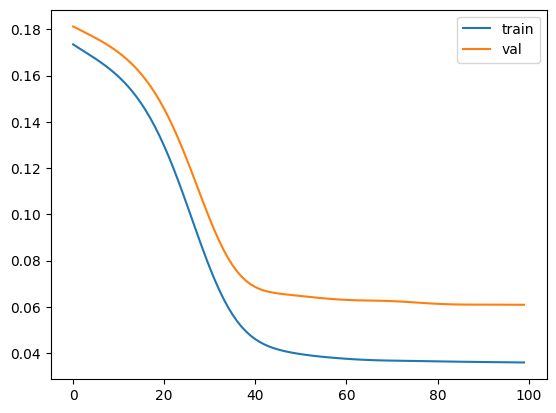

In [52]:
import matplotlib.pyplot as plt

plt.plot(history['train_loss'],label='train')
plt.plot(history['val_loss'],label='val')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

def mape(a, b):
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()*100

In [54]:
result = pd.DataFrame()

In [55]:
for x,y in val_loader:
    y_hat = r2d2_forward(best_model,x,eval=True)
    y_hat = y_hat.detach().numpy()
    y = y.detach().numpy()
    result['r2'] = [r2_score(y,y_hat)]
    result['mse'] = [mean_squared_error(y,y_hat)]
    result['mape'] = [mape(y,y_hat)]
result

<ipython-input-53-7f89ebd389d4>:6: RuntimeWarning: divide by zero encountered in divide
  return (np.fabs(a - b)/a)[mask].mean()*100


,r2,mse,mape
0,-45.364623,0.060842,186.117744
